### What are the regional sales in the best performing country?

c:\Users\ayah\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


        Name      SalesYTD  SalesLastYear
0  Northwest  7.887187e+06   3.298694e+06
1  Northeast  2.402177e+06   3.607149e+06
2    Central  3.072175e+06   3.205014e+06
3  Southwest  1.051085e+07   5.366576e+06
4  Southeast  2.538667e+06   3.925071e+06
-------------------------------------------
        Name    TotalSales
4  Southwest  1.587743e+07
2  Northwest  1.118588e+07
3  Southeast  6.463739e+06
0    Central  6.277189e+06
1  Northeast  6.009326e+06


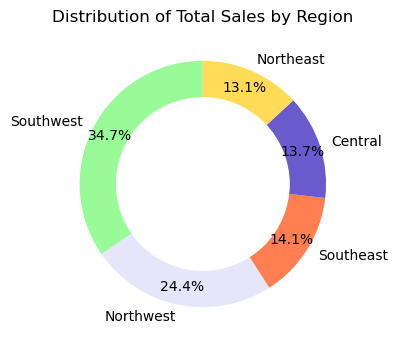

In [2]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

# Establish a database connection
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=********;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
)

# Define the SQL query
sql_query = """
SELECT TOP (1000) [Name], [SalesYTD], [SalesLastYear]
FROM [AdventureWorks2022].[Sales].[SalesTerritory]
WHERE CountryRegionCode = 'US'
"""

# Execute the SQL query and store the result in a pandas DataFrame
sales_data2 = pd.read_sql(sql_query, conn)
print(sales_data2.head())

# Close the database connection
conn.close()

# Calculate total sales and sort the data
sales_data2['TotalSales'] = sales_data2['SalesYTD'] + sales_data2['SalesLastYear']
ordered = sales_data2.groupby('Name').agg({'TotalSales':'sum'}).reset_index().sort_values(by='TotalSales', ascending=False)
print('-------------------------------------------')
print(ordered.head())

# Plotting
plt.figure(figsize=(4,4)) 
colors = ['#98FB98', '#E6E6FA', '#FF7F50', '#6A5ACD', '#FFDB58', '#D8BFD8', '#008080', '#C0C0C0']
plt.pie(ordered['TotalSales'], labels= ordered['Name'], autopct='%.1f%%' ,pctdistance=0.85, colors=colors, startangle=90)

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf() # get current figure
plt.title('Distribution of Total Sales by Region')
fig.gca().add_artist(centre_circle) # get current axis

plt.show()
